<a href="https://colab.research.google.com/github/mevangelista-alvarado/machine_learning/blob/main/Regresion_Logistica_primer_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

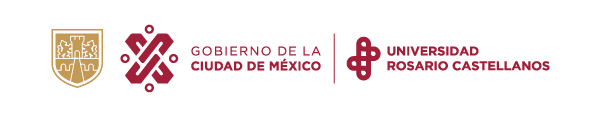

**Actualizado:** Octubre de 2023

**Autor:** Miguel Evangelista ([@mevagelista-alvarado](https://github.com/mevangelista-alvarado))

## Introducción

En este Google Colab mostramos una implementación de Regresión Logística en un ejemplo simple con Python puro.   

## Regresion Logística

### Introducción

La regresión logística clásica es muy común que se utilice para predecir variables dicotómicas ($0$ ó $1$).

En medicina, por ejemplo, una aplicación frecuente es averiguar qué variables influyen en una enfermedad. En este caso, 0 podría significar no enfermo y 1 enfermo.  


Posteriormente, se podría examinar la influencia de la edad, el sexo y el hábito de fumar (fumador o no) en esta enfermedad concreta.

En la regresión lineal, las variables independientes ($x$) se utilizan para estimar el valor específico de la variable dependiente ($y$).




En cambio, en la regresión logística, la variable dependiente es dicotómica (0 ó 1) y se estima la probabilidad de que se produzca la expresión 1.




Volviendo al ejemplo anterior, esto significa: ¿Qué probabilidad hay de que se produzca una enfermedad, si la persona considerada tiene una edad, un sexo y un hábito relativo al tabaco determinados.

#### Tipos de Regresión Logística

##### Regresión logística Clásica


La regresión logística clásica funciona bien para problemas de clasificación binaria que solo tienen dos resultados posibles, es decir, la variable dependiente solo puede tener dos valores, como 0 y 1.

Aunque la función logística calcula un rango de valores entre 0 y 1, el modelo de regresión binaria redondea la respuesta a los valores más cercanos.

Por lo general, las respuestas por debajo de 0,5 se redondean a 0 y las respuestas por encima de 0,5 se redondean a 1.



##### Regresión logística multinomial


La regresión multinomial puede analizar problemas que tienen varios resultados posibles, siempre y cuando el número de resultados sea finito.

Por ejemplo, puede predecir si los precios de la vivienda aumentarán un $25\%$, $50\%$, $75\%$ o $100\%$ en función de los datos de población, pero no puede predecir el valor exacto de una casa.




### Función logística

La función logística (logit) simple es una función $f:\mathbb{R}\to\mathbb{R}$ se define mediante la expresión matemática:

$$f(x)=\frac{1}{1+e^{-x}}$$

donde $e$ es la constante de Euler, que tiene un valor aproximado de $2.71828$.

#### Gráfica de la función logística

Importamos los módulos necesarios

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definimos la función logistica

In [2]:
def logistic_function(x):
    """ Definimos la función logit (sigmoide) """
    return 1 / (1 + np.exp(-x))

Definimos los puntos que vamos a utlizar en el eje de las $x$ opara graficar

In [3]:
x_values = np.linspace(-10, 10, 1000)

Calculamos los valores para $y$ correspondientes a $x$ utilizando la función logit

In [4]:
logit_values = logistic_function(x_values)

Graficamos la función

In [ ]:
# Grafica la función logit
plt.plot(x_values, logit_values, label='Función Logit', color='b')

# Etiquetas
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Logística')

plt.grid(True)
plt.show()

##### Límites de la función logística

Calculamos los siguientes límites ( con `Sympy`)



1.   $lim_{x\to\infty}\frac{1}{1+e^{-x}}=1$



In [ ]:
import sympy as sp
# Definimos la variable
x = sp.symbols('x')
# Definimos la función
f = 1 / (1 + sp.exp(-x))
# Calculamos el limite
limite = sp.limit(f, x, sp.oo)
print(f"Límite de la función {f}:", limite)


2.   $lim_{x\to-\infty}\frac{1}{1+e^{-x}}=0$

In [ ]:
import sympy as sp
# Definimos la variable
x = sp.symbols('x')
# Definimos la función
f = 1 / (1 + sp.exp(-x))
# Calculamos el limite
limite = sp.limit(f, x, -sp.oo)
print(f"Límite de la función {f}:", limite)

Lo cual es claro, para esto se deja al lector que compruebe los límites: $lim_{x\to\infty}e^{-x}=0$ y $lim_{x\to-\infty}e^{-x}=-\infty$.

Notemos que la elección de esta función es apropiada por que esta acotada entre $0$ y $1$.

### Regresión Logística

Para construir un modelo de regresión logística, se parte de la ecuación de regresión lineal.

$$y = a_{1}x_{2} + \dots +a_{n}x_{n}$$

Si graficamos la ecuacion de regresión lineal, notamos que pueden darse valores entre más y menos infinito, para esto simplemente hay que calular los limites de forma análoga con la función logística.  


El objetivo de la regresión logística es estimar la probabilidad de ocurrencia.

Para cumplir lo anterior, aplicamos la función logística a la ecuación de regresión, el resultado es:

$$f(y) = f(a_{1}x_{2} + \dots +a_{n}x_{n}) = \frac{1}{1+e^{-(a_{1}x_{2} + \dots +a_{n}x_{n})}}$$

Esto garantiza que, independientemente del intervalo en que se encuentren los valores de x, sólo resultarán valores entre 0 y 1.

Para calcular la probabilidad de que una persona esté enferma o no mediante la regresión logística del ejemplo anterior, primero hay que determinar los parámetros del modelo de regresión lineal.

#### Estimación de coeficientes


¿Cómo encontramos los coeficientes antes mencionados que minimicen la función de pérdida?  

Hay dos enfoques principales para la regresión logística: descenso de gradiente y estimación de máxima verosimilitud.

### Ejemplo de Implementación

En este ejemplo, entrenamos un modelo de regresión logística  utilizando un enfoque de descenso de gradiente.


El modelo se entrena para predecir si un estudiante aprobará o reprobará un examen en función de la cantidad de horas de estudio.

Definimos las variables

In [8]:
horas_de_estudio = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
# 1 significa aprobado,
# 0 significa reprobado
aprobado = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

Inicializamos los parámetros del modelo


In [22]:
learning_rate = 0.01
num_epochs = 10000
w = 0.10
b = 0.10

Entrenamos el modelo

In [23]:
# Entrenamiento del modelo
for epoch in range(num_epochs):
    dw = 0
    db = 0
    for i in range(len(horas_de_estudio)):
        # Calculamos la predicción
        z = w * horas_de_estudio[i] + b
        predicciones = 1 / (1 + 2.71828**(-z))

        # Calculamos el error
        error = predicciones - aprobado[i]

        # Actualizamos los gradientes
        dw += horas_de_estudio[i] * error # Esto es equivalente a dw = dw + horas_de_estudio[i] * error
        db += error # Esto es equivalente a db = db + error

    dw /= len(horas_de_estudio) # Esto es equivalente a dw = dw / len(horas_de_estudio)
    db /= len(horas_de_estudio) # Esto es equivalente a db = db / len(horas_de_estudio)

    # Actualizamos los parámetros
    w -= learning_rate * dw # Esto es equivalente a w = w - learning_rate * dw
    b -= learning_rate * db # Esto es equivalente a b = b - learning_rate * db
    # print(f"Los nuevos valores son w: {w} y b: {b}")

Definimos una función para predecir

In [24]:
def predecir(horas):
    z = w * horas + b
    probabilidad_aprobacion = 1 / (1 + 2.71828**(-z))
    if probabilidad_aprobacion >= 0.5:
        return "Aprobado"
    else:
        return "Reprobado"

Probamos el modelo

In [ ]:
horas_estudio_nuevas = [0, 3, 6, 9, 14, 21, 23]
for horas in horas_estudio_nuevas:
    resultado = predecir(horas)
    print(f"Con {horas} horas de estudio, el estudiante será {resultado}")

## Medición de Errores

La métrica `accuracy_score` proporciona una medida de la precisión del modelo en términos de la proporción de predicciones correctas en relación con el total de predicciones.  

Es una de las métricas más simples y ampliamente utilizadas en problemas de clasificación.

In [ ]:
from sklearn.metrics import accuracy_score

# Datos de prueba
horas_estudio_nuevas = [0, 15, 3, 21]
etiquetas_reales = ["Reprobado", "Reprobado", "Reprobado", "Aprobado"]

predicciones = [predecir(horas) for horas in horas_estudio_nuevas]

# Calcula la precisión
precision = accuracy_score(etiquetas_reales, predicciones)

print("Labels:", etiquetas_reales)
print("Predicciones de modelo:", predicciones)
print("Precisión del modelo:", precision)

#### Matriz de Confusión

La matriz de confusión es una herramienta importante para evaluar el rendimiento de un modelo de clasificación.


Proporciona información detallada sobre cómo el modelo ha clasificado las instancias en función de las etiquetas reales.


La matriz de confusión se representa de la siguiente manera:

|                | Predicción Positiva | Predicción Negativa |
|----------------|---------------------|---------------------|
| Etiqueta Positiva | Verdadero Positivo | Falso Negativo  |
| Etiqueta Negativa | Falso Positivo     | Verdadero Negativo |


Las cuatro celdas de la matriz de confusión tienen los siguientes significados:

*   Verdadero Positivo:  
    Representa las instancias que el modelo ha clasificado correctamente como positivas cuando en realidad eran positivas.
    
    En el contexto del ejemplo, son los estudiantes que fueron correctamente clasificados como "Aprobado".  
*   Falso Negativo:
    Representa las instancias que el modelo ha clasificado incorrectamente como negativas, cuando en realidad eran positivas.  
    
    En el ejemplo, son los estudiantes que fueron clasificados como "Reprobado" pero que deberían haber sido clasificados como "Aprobado".

*   Falso Positivo:
    Representa las instancias que el modelo ha clasificado incorrectamente como positivas, cuando en realidad eran negativas.
    
    En dicho ejemplo, son los estudiantes que fueron clasificados como "Aprobado" pero que deberían haber sido clasificados como "Reprobado".

*   Verdadero Negativo:  
    Representa las instancias que el modelo ha clasificado correctamente como negativas, cuando en realidad eran negativas.
    
    En el ejemplo, son los estudiantes que fueron correctamente clasificados como "Reprobado".

In [ ]:
# Importa las bibliotecas necesarias
from sklearn.metrics import confusion_matrix

# Datos de prueba
horas_estudio_nuevas = [0, 15, 3, 21]
etiquetas_reales = ["Reprobado", "Reprobado", "Reprobado", "Aprobado"]

predicciones = [predecir(horas) for horas in horas_estudio_nuevas]

# Calcula la precisión
precision = accuracy_score(etiquetas_reales, predicciones)

# Calcula la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_reales, predicciones)

print("Matriz de confusión:")
print(matriz_confusion)